In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train (1).csv


Dataset Loaded Successfully
Shape: (74111, 29)

Model Performance (Log Price):
R2 Score: 0.706
RMSE: 0.389

Top 10 Important Features:
              Feature  Importance
1           room_type    0.372819
3           bathrooms    0.118135
13          longitude    0.117225
12           latitude    0.097765
20    amenities_count    0.038802
15  number_of_reviews    0.034864
2        accommodates    0.033637
18           bedrooms    0.029168
17            zipcode    0.028970
14      neighbourhood    0.025228


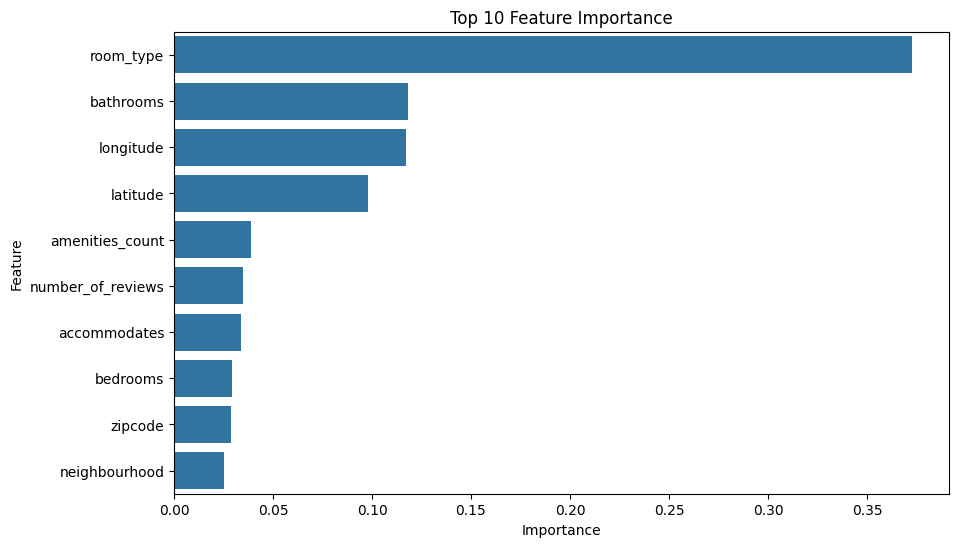


Sample Prediction:
Predicted Log Price: 3.82
Actual Log Price: 3.807


In [ ]:
# ================================
# AIRBNB PRICE PREDICTION (FINAL FIXED VERSION)
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("train.csv")

print("Dataset Loaded Successfully")
print("Shape:", df.shape)

# ================================
# Clean Special Columns
# ================================

# Clean host_response_rate (remove %)
if 'host_response_rate' in df.columns:
    df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%','')
    df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

# Convert amenities to count (better feature)
if 'amenities' in df.columns:
    df['amenities_count'] = df['amenities'].astype(str).apply(lambda x: len(x.split(',')))
    df.drop('amenities', axis=1, inplace=True)

# Drop unnecessary text columns
drop_cols = ['id','name','description','thumbnail_url',
             'first_review','last_review','host_since']
for col in drop_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

# Fill missing values
df.fillna(0, inplace=True)

# ================================
# Encode Categorical Columns SAFELY
# ================================

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str)
    df[col] = df[col].factorize()[0]

# ================================
# Define Target (log_price is already numeric)
# ================================

X = df.drop('log_price', axis=1)
y = df['log_price']

# ================================
# Train-Test Split
# ================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ================================
# Train Model
# ================================

model = RandomForestRegressor(
    n_estimators=150,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# ================================
# Prediction
# ================================

y_pred = model.predict(X_test)

# ================================
# Evaluation
# ================================

print("\nModel Performance (Log Price):")
print("R2 Score:", round(r2_score(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

# ================================
# Feature Importance
# ================================

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
print(importance.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title("Top 10 Feature Importance")
plt.show()

# ================================
# Sample Prediction
# ================================

sample = X_test.iloc[0].values.reshape(1, -1)
predicted_log_price = model.predict(sample)[0]

print("\nSample Prediction:")
print("Predicted Log Price:", round(predicted_log_price,3))
print("Actual Log Price:", round(y_test.iloc[0],3))
